<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Investigaci-n-de-operaciones/blob/main/Redes%20con%20Networkx%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos de redes con NetworkX**



In [ ]:
import networkx as nx
G = nx.Graph()
G

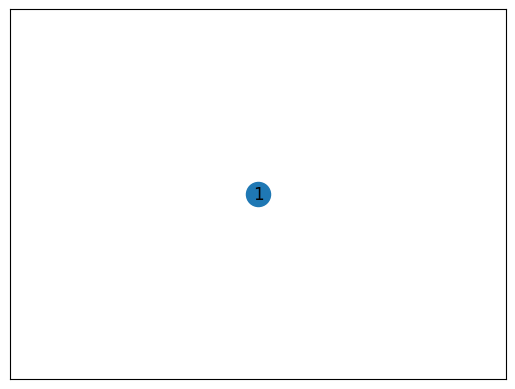

In [ ]:
nx.draw_networkx(G) #Esta función genera el gráfico
G.add_node(1) #Esta función genera el nodo

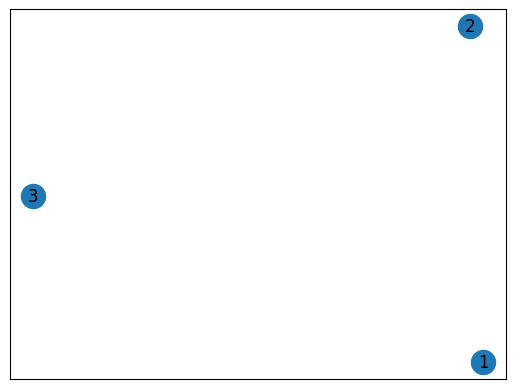

In [ ]:
nx.draw_networkx(G)
G.add_nodes_from([2, 3]) #Esta función genera nodos desde el primer número hasta el último sin la necesidad de hacer uno a uno

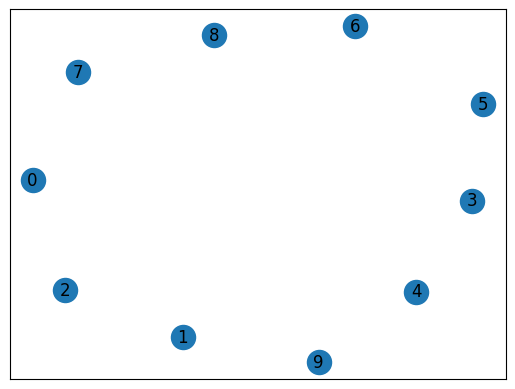

In [ ]:
nx.draw_networkx(G)
H = nx.path_graph(10) #Esta función agrega los nodos de una variable diferente
G.add_nodes_from(H)

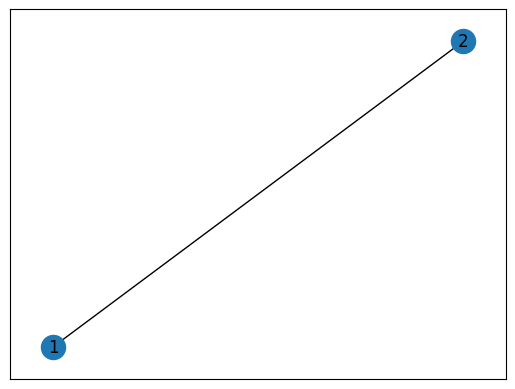

In [ ]:
nx.draw_networkx(G)
G.add_edge(1, 2) #Esta función genera arcos entre los nodos antes generados

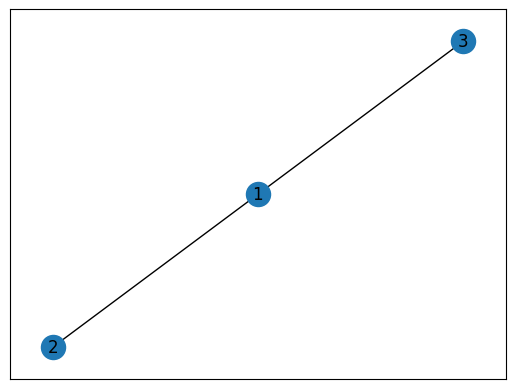

In [ ]:
nx.draw_networkx(G)
G.add_edges_from([(1, 2), (1, 3)]) #Esta función genera más de un arco a la vez

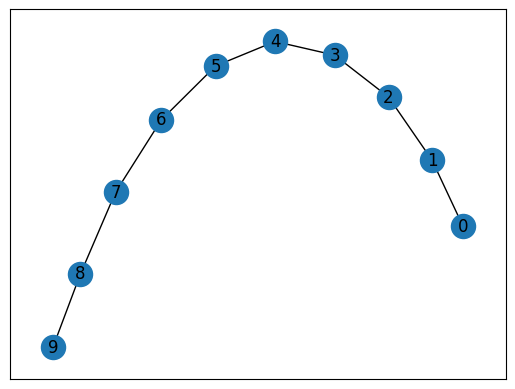

In [ ]:
nx.draw_networkx(G)
G.add_edges_from(H.edges) #Esta función genera arcos a los nodos de la variable H

In [ ]:
G.number_of_nodes() #Esta función devuelve el número de nodos

10

In [ ]:
G.number_of_edges() #Esta función devuelve el número de arcos

9

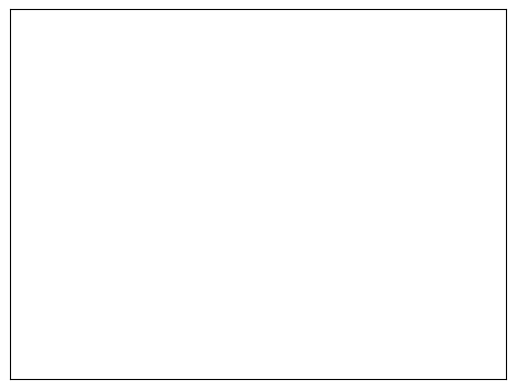

In [ ]:
nx.draw_networkx(G)
G.clear() #Esta funcion limpia la grafica

In [ ]:
list(G.nodes) #Esta función devuelve la lista de nodos que conforman la red


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(G.edges) #Esta función devuelve la lista de arcos que conforman la red


[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [ ]:
G.degree[1] #Esta función devuelve cuantas conexiones tiene cada nodo

2

In [ ]:
G.remove_node(2)
list(G.nodes) #Esta función elimina de los nodos el nodo que se pide

[0, 1, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
G = nx.Graph(day="Friday")
G.graph #Esta función asigna atributos a la gráfica

{'day': 'Friday'}

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight') #Esta función genera la suma de los pesos de los arcos

0.5

In [ ]:
list(DG.successors(1)) #Esta función devuelve cuantos arcos sucesivos hay

[2]

Finalmente se muestra un ejemplo de un gráfico de nodos y arcos.

In [ ]:
import networkx as nx

G = nx.DiGraph() #Ejemplo de grafo dirigido
G.add_edge("A", "B", capacity=2)
G.add_edge("A", "C", capacity=2)
G.add_edge("B", "D", capacity=2)
G.add_edge("B", "C", capacity=2)
G.add_edge("C", "D", capacity=2)
G

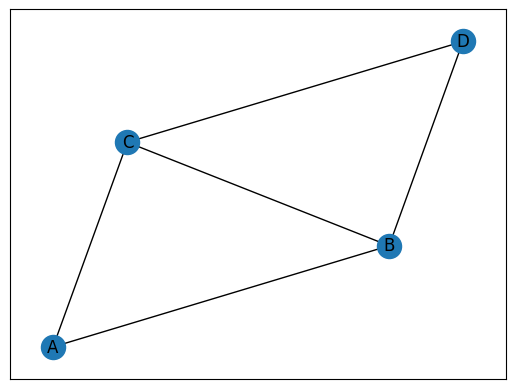

In [ ]:
nx.draw_networkx(G) #Esta función devuelve la gráfica de los nodos y sus direcciones

In [ ]:
nx.nodes(G)

NodeView(('A', 'B', 'C', 'D'))

In [ ]:
nx.number_of_nodes(G)

4

In [ ]:
nx.edges(G)

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')])

In [ ]:
nx.number_of_edges(G)

5

In [ ]:
nx.degree(G)

DegreeView({'A': 2, 'B': 3, 'C': 3, 'D': 2})

Árbol de expansión mínima.

Es un subconjunto de los arcos de un nodo ponderado que conecta todos los vértices sin formar ciclos y con una suma total de pesos de arcos mínima.

Arcos del Árbol de Expansión Mínima:
A -- C (peso: 7)
B -- E (peso: 2)
C -- D (peso: 4)
D -- E (peso: 3)
D -- F (peso: 6)

Peso total del Árbol de Expansión Mínima: 22.0


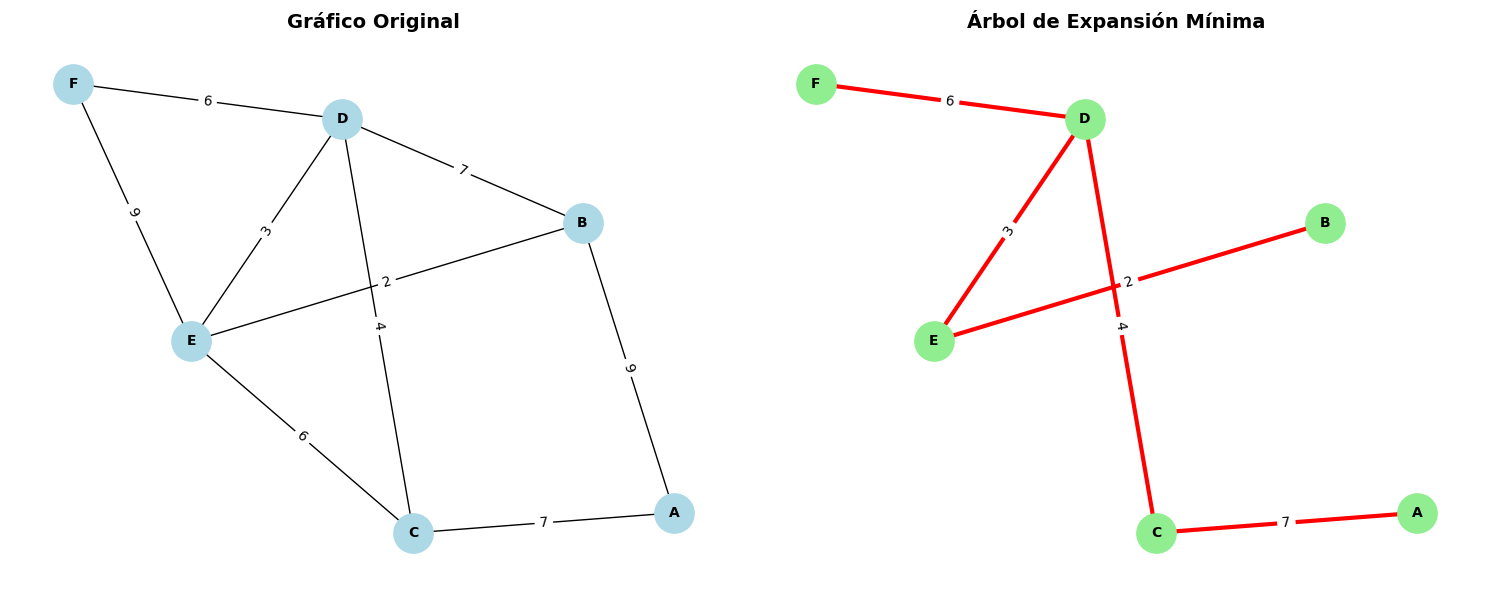

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def mst_networkx_basico():

    # Crear una gráfica
    G = nx.Graph()

    # Agregar arcos con pesos, ejercicio de clase
    edges = [
        ('A', 'B', 9), ('A', 'C', 7),
        ('B', 'D', 7), ('B', 'E', 2),
        ('C', 'D', 4), ('C', 'E', 6),
        ('D', 'E', 3), ('D', 'F', 6),
        ('E', 'F', 9)
    ]

    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # Calcular el árbol de expansión mínima
    mst = nx.minimum_spanning_tree(G)

    # Mostrar información
    print("Arcos del Árbol de Expansión Mínima:")
    for edge in mst.edges(data=True):
        print(f"{edge[0]} -- {edge[1]} (peso: {edge[2]['weight']})")

    print(f"\nPeso total del Árbol de Expansión Mínima: {mst.size(weight='weight')}")

    #Generar gráfico del árbol de expansión mínima
    visualizar_mst(G, mst)

    return G, mst

def visualizar_mst(G, mst):

    #Visualización del gráfico original y el Árbol de Expansión Mínima

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Posiciones para los nodos (consistentes en ambos gráficos)
    pos = nx.spring_layout(G, seed=42)

    # Gráfico original
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=800, ax=ax1, font_size=10, font_weight='bold')

    # Etiquetas de pesos en el gráfico original
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    ax1.set_title("Gráfico Original", fontsize=14, fontweight='bold')

    # Árbol de expansión mínima
    nx.draw(mst, pos, with_labels=True, node_color='lightgreen',
            node_size=800, ax=ax2, font_size=10, font_weight='bold',
            edge_color='red', width=3)

    # Etiquetas de pesos en el Árbol de Expansión Mínima
    mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=mst_edge_labels, ax=ax2)

    ax2.set_title("Árbol de Expansión Mínima", fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Ejecutar ejemplo
G, mst = mst_networkx_basico()


Ruta más corta

Es el problema de encontrar el camino de menor costo, distancia o tiempo entre un nodo origen y un nodo destino en una red.

Ruta más corta A → F
Ruta más corta desde A hasta F:
A -> C -> D -> F
Distancia total: 17

Arcos de la ruta más corta:
A -- C (peso: 7)
C -- D (peso: 4)
D -- F (peso: 6)


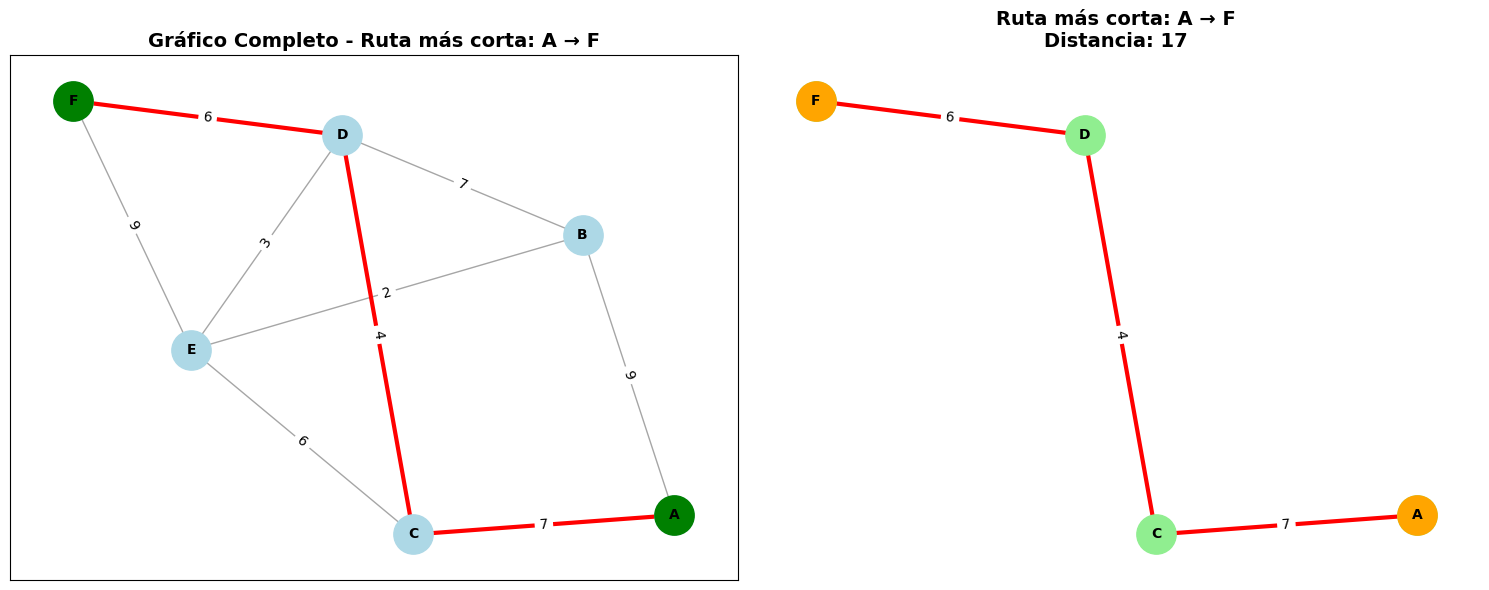

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

def ruta_mas_corta():
    # Ejemplo de ruta más corta, ejercicio de clase

    # Crear un gráfico
    G = nx.Graph()

    # Agregar arcos con pesos
    edges = [
        ('A', 'B', 9), ('A', 'C', 7),
        ('B', 'D', 7), ('B', 'E', 2),
        ('C', 'D', 4), ('C', 'E', 6),
        ('D', 'E', 3), ('D', 'F', 6),
        ('E', 'F', 9)
    ]

    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # Definir nodo origen y destino
    origen = 'A'
    destino = 'F'

    # Calcular la ruta más corta usando Dijkstra
    try:
        shortest_path = nx.shortest_path(G, source=origen, target=destino, weight='weight')
        path_length = nx.shortest_path_length(G, source=origen, target=destino, weight='weight')

        # Mostrar información
        print(f"Ruta más corta desde {origen} hasta {destino}:")
        print(" -> ".join(shortest_path))
        print(f"Distancia total: {path_length}")

        print("\nArcos de la ruta más corta:")
        for i in range(len(shortest_path) - 1):
            u = shortest_path[i]
            v = shortest_path[i + 1]
            weight = G[u][v]['weight']
            print(f"{u} -- {v} (peso: {weight})")

    except nx.NetworkXNoPath:
        print(f"No existe ruta entre {origen} y {destino}")
        return G, None

    # Generar gráfico de la ruta más corta
    visualizar_ruta_corta(G, shortest_path, origen, destino)

    return G, shortest_path

def visualizar_ruta_corta(G, shortest_path, origen, destino):

    # Visualiza el gráfico completo y resalta la ruta más corta
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Posiciones para los nodos (consistentes en ambos gráficos)
    pos = nx.spring_layout(G, seed=42)

    # Gráfico completo con ruta resaltada
    # Dibujar todos los nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=800, ax=ax1)

    # Dibujar todos los nodos
    nx.draw_networkx_edges(G, pos, edge_color='gray',
                          width=1, alpha=0.7, ax=ax1)

    # Resaltar la ruta más corta
    path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                          edge_color='red', width=3, ax=ax1)

    # Resaltar nodos de origen y destino
    nx.draw_networkx_nodes(G, pos, nodelist=[origen, destino],
                          node_color='green', node_size=800, ax=ax1)

    # Etiquetas
    nx.draw_networkx_labels(G, pos, ax=ax1, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    ax1.set_title(f"Gráfico Completo - Ruta más corta: {origen} → {destino}",
                 fontsize=14, fontweight='bold')

    # Solo la ruta más corta
    # Crear subgráfico con solo la ruta
    path_graph = nx.Graph()
    for i in range(len(shortest_path) - 1):
        u = shortest_path[i]
        v = shortest_path[i + 1]
        weight = G[u][v]['weight']
        path_graph.add_edge(u, v, weight=weight)

    # Dibujar solo la ruta
    nx.draw(path_graph, pos, with_labels=True, node_color='lightgreen',
            node_size=800, ax=ax2, font_size=10, font_weight='bold',
            edge_color='red', width=3)

    # Resaltar nodos de origen y destino
    nx.draw_networkx_nodes(path_graph, pos, nodelist=[origen, destino],
                          node_color='orange', node_size=800, ax=ax2)

    # Etiquetas de pesos en la ruta
    path_edge_labels = nx.get_edge_attributes(path_graph, 'weight')
    nx.draw_networkx_edge_labels(path_graph, pos, edge_labels=path_edge_labels, ax=ax2)

    ax2.set_title(f"Ruta más corta: {origen} → {destino}\nDistancia: {nx.shortest_path_length(G, source=origen, target=destino, weight='weight')}",
                 fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Ejecutar ejemplo
if __name__ == "__main__":
    print("Ruta más corta A → F")
    G, ruta = ruta_mas_corta()

Flujo máximo

Es un problema de optimización que consiste en determinar la cantidad máxima de "flujo" que puede ser enviado desde un nodo a través de una red de arcos con capacidades limitadas.

Flujo máximo A → F
FLUJO MÁXIMO desde A hasta F: 15

Flujo en cada arco:
A → B: 9/9
A → C: 6/7
B → D: 7/7
B → E: 2/2
C → D: 2/4
C → E: 4/6
D → E: 3/3
D → F: 6/6
E → F: 9/9

CORTE MÍNIMO: 15
Conjunto del origen: ['A', 'B', 'C', 'D', 'E']
Conjunto del destino: ['F']

Arcos del corte mínimo:
D → F (capacidad: 6)
E → F (capacidad: 9)


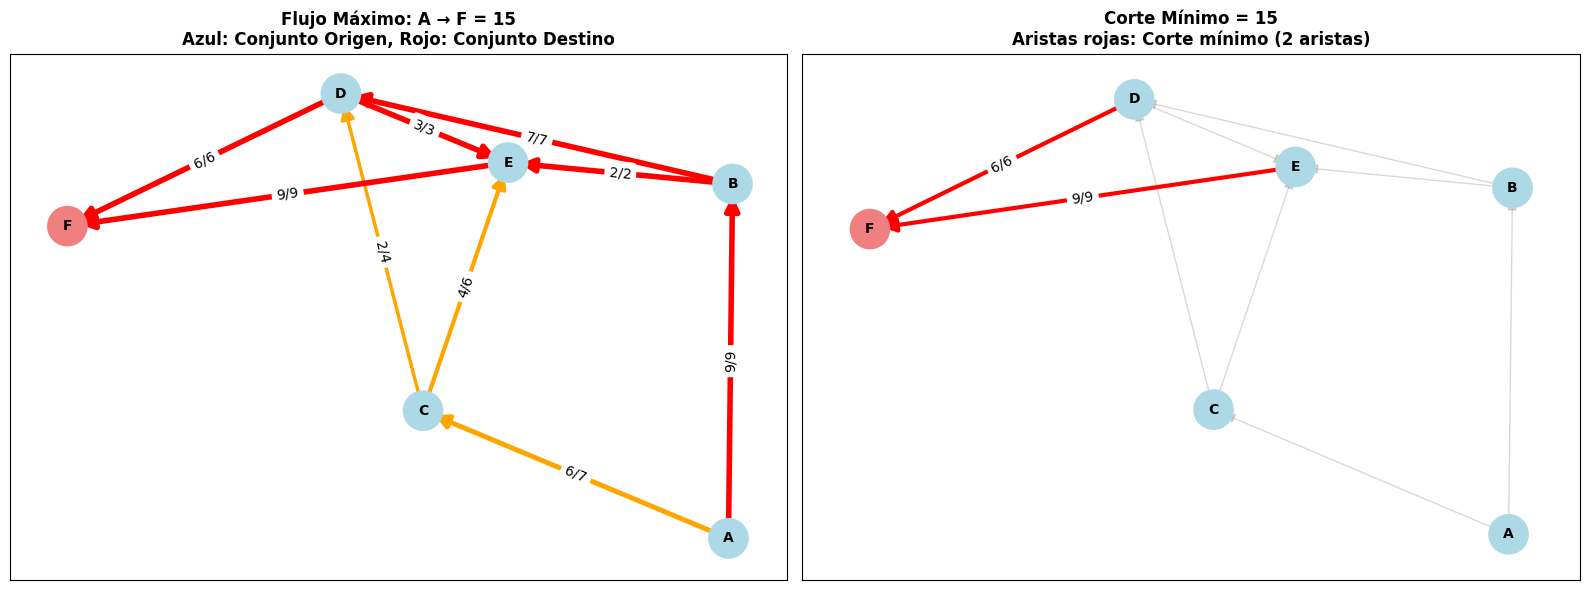

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

def flujo_maximo():
    # Ejemplo de flujo máximo con Networkx

    # Crear un gráfico dirigido para flujo máximo
    G = nx.DiGraph()

    # Agregar arcos con pesos
    edges = [
        ('A', 'B', 9), ('A', 'C', 7),
        ('B', 'D', 7), ('B', 'E', 2),
        ('C', 'D', 4), ('C', 'E', 6),
        ('D', 'E', 3), ('D', 'F', 6),
        ('E', 'F', 9)
    ]

    for u, v, capacity in edges:
        G.add_edge(u, v, capacity=capacity)

    # Definir origen y destino
    origen = 'A'
    destino = 'F'

    # Calcular el flujo máximo
    try:
        flujo_valor, flujo_dict = nx.maximum_flow(G, origen, destino)

        # Mostrar información
        print(f"FLUJO MÁXIMO desde {origen} hasta {destino}: {flujo_valor}")

        print("\nFlujo en cada arco:")
        for u in sorted(flujo_dict.keys()):
            for v in sorted(flujo_dict[u].keys()):
                if flujo_dict[u][v] > 0:
                    capacidad = G[u][v]['capacity']
                    print(f"{u} → {v}: {flujo_dict[u][v]}/{capacidad}")

        # Calcular el corte mínimo
        corte_valor, particion = nx.minimum_cut(G, origen, destino)
        conjunto_origen, conjunto_destino = particion

        print(f"\nCORTE MÍNIMO: {corte_valor}")
        print(f"Conjunto del origen: {sorted(conjunto_origen)}")
        print(f"Conjunto del destino: {sorted(conjunto_destino)}")

        # Mostrar arcos del corte
        print("\nArcos del corte mínimo:")
        for u in conjunto_origen:
            for v in conjunto_destino:
                if G.has_edge(u, v):
                    capacidad = G[u][v]['capacity']
                    print(f"{u} → {v} (capacidad: {capacidad})")

    except Exception as e:
        print(f"Error: {e}")
        return G, None, None

    # Generar gráfico del flujo máximo
    visualizar_flujo_maximo(G, flujo_dict, origen, destino, flujo_valor, particion)

    return G, flujo_valor, flujo_dict

def visualizar_flujo_maximo(G, flujo_dict, origen, destino, flujo_valor, particion):
    # Visualizar el gráfico con el flujo máximo y el corte mínimo

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Posiciones para los nodos
    pos = nx.spring_layout(G, seed=42)

    conjunto_origen, conjunto_destino = particion

    # Gráfico con flujos
    # Colorear nodos según el conjunto
    color_nodos = []
    for node in G.nodes():
        if node in conjunto_origen:
            color_nodos.append('lightblue')
        else:
            color_nodos.append('lightcoral')

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color=color_nodos,
                          node_size=800, ax=ax1)

    # Dibujar arcos con grosor proporcional al flujo
    for u, v, data in G.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u].get(v, 0)

        # Calcular ancho basado en el flujo
        ancho = 1 + (flujo_actual / capacidad) * 3 if capacidad > 0 else 1

        # Color basado en utilización
        if flujo_actual == capacidad:
            color = 'red'  # Arco saturado
        elif flujo_actual > 0:
            color = 'orange'  # Arco utilizado
        else:
            color = 'gray'  # Arco no utilizado

        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                              width=ancho, edge_color=color, ax=ax1,
                              arrows=True, arrowsize=20)

    # Etiquetas de nodos
    nx.draw_networkx_labels(G, pos, ax=ax1, font_size=10, font_weight='bold')

    # Etiquetas de arcos (flujo/capacidad)
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u].get(v, 0)
        edge_labels[(u, v)] = f"{flujo_actual}/{capacidad}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)

    ax1.set_title(f"Flujo Máximo: {origen} → {destino} = {flujo_valor}\n"
                 f"Azul: Conjunto Origen, Rojo: Conjunto Destino",
                 fontsize=12, fontweight='bold')

    # Red de flujo resaltando el corte mínimo
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color=color_nodos,
                          node_size=800, ax=ax2)

    # Dibujar todos los arcos en gris primero
    nx.draw_networkx_edges(G, pos, edge_color='gray',
                          width=1, alpha=0.3, ax=ax2, arrows=True, arrowsize=15)

    # Resaltar arcos del corte mínimo
    aristas_corte = []
    for u in conjunto_origen:
        for v in conjunto_destino:
            if G.has_edge(u, v):
                aristas_corte.append((u, v))

    nx.draw_networkx_edges(G, pos, edgelist=aristas_corte,
                          edge_color='red', width=3, ax=ax2,
                          arrows=True, arrowsize=20)

    # Etiquetas
    nx.draw_networkx_labels(G, pos, ax=ax2, font_size=10, font_weight='bold')

    # Etiquetas solo para arcos del corte
    corte_edge_labels = {}
    for u, v in aristas_corte:
        capacidad = G[u][v]['capacity']
        flujo_actual = flujo_dict[u].get(v, 0)
        corte_edge_labels[(u, v)] = f"{flujo_actual}/{capacidad}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=corte_edge_labels, ax=ax2)

    ax2.set_title(f"Corte Mínimo = {flujo_valor}\n"
                 f"Aristas rojas: Corte mínimo ({len(aristas_corte)} aristas)",
                 fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Ejecutar ejemplo en clase
if __name__ == "__main__":
    print("Flujo máximo A → F")
    G, flujo_valor, flujo_dict = flujo_maximo()